# Modeling and Simulation in Python

Chapter 15

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [11]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### The coffee cooling problem

I'll use a `State` object to store the initial temperature.


In [12]:
init = State(T=37,Q=0)

,values
T,37
Q,0


And a `System` object to contain the system parameters.

In [42]:
coffee = System(init=init,
                SA=1.6*.99,
                r=.41/1.136,
                r2=.21/1.136,
                r3=.04/1.136,
                T_env=4,
                t_end=20,
                dt=.1)

,values
init,T 37 Q 0 dtype: int64
SA,1.584
r,0.360915
r2,0.184859
r3,0.0352113
T_env,4
t_end,20
dt,0.1


The update function implements Newton's law of cooling.

In [53]:
def update_func(state, t, system):
    """Update the thermal transfer model.
    
    state: State (temp)
    t: time
    system: System object
    
    returns: State (temp)
    """
    unpack(system)
    
    T, Q = state
    #Shirt = -r * (T - T_env) * dt
    #Pants = -r2 * (T - T_env) * dt
    #Socks = -r3 * (T - T_env) * dt
    #T += Shirt + Pants + Socks
    Q += (SA * (T - T_env)/r)* dt
    
    return State(Q=Q)

Here's how it works.

In [54]:
update_func(init, 0, coffee)

,values
Q,8.99712


Here's a version of `run_simulation` that uses `linrange` to make an array of time steps.

In [55]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    ts = linrange(0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
        
    # store the final temperature in T_final
    system.T_final = get_last_value(frame.T)
    
    return frame

And here's how it works.

In [56]:
results = run_simulation(coffee, update_func)

,T,Q
0.0,37,0
0.1,NaN,8.99712
0.2,NaN,NaN
0.3,NaN,NaN
0.4,NaN,NaN
0.5,NaN,NaN
0.6,NaN,NaN
0.7,NaN,NaN
0.8,NaN,NaN
0.9,NaN,NaN


Here's what the results look like.

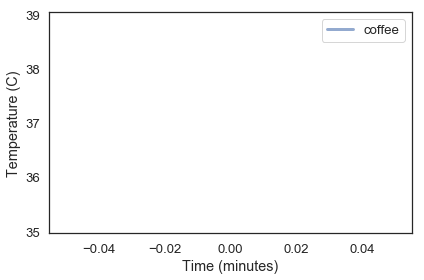

In [57]:
plot(results.T, label='coffee')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

And here's the final temperature:

In [25]:
coffee.T_final

nan

## Encapsulation

Before we go on, let's define a function to initialize `System` objects with relevant parameters:

In [10]:
def make_system(T_init, r, volume, t_end):
    """Makes a System object with the given parameters.

    T_init: initial temperature in degC
    r: heat transfer rate, in 1/min
    volume: volume of liquid in mL
    t_end: end time of simulation
    
    returns: System object
    """
    init = State(T=T_init)
    
    # T_final is used to store the final temperature.
    # Before the simulation runs, T_final = T_init
    T_final = T_init

    T_env = 22 
    dt = 1
                
    return System(locals())

Here's how we use it:

In [11]:
coffee = make_system(T_init=90, r=0.01, volume=300, t_end=30)
results = run_simulation(coffee, update_func)
coffee.T_final

## Exercises

**Exercise:**  Simulate the temperature of 50 mL of milk with a starting temperature of 5 degC, in a vessel with the same insulation, for 15 minutes, and plot the results.

By trial and error, find a values for `r` that makes the final temperature close to 20 C.

In [12]:
# Solution goes here

In [13]:
plot(results.T, label='milk')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')